In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
second = pd.read_excel('./data/delete_duplicated.xlsx')

## 과일군
- 980 - 1136

- 우유군에 해당하는 식품군을 가져온다.

In [5]:
start = 980
end = 1136

In [6]:
tmp_01 = second[start:(end + 1)]

In [7]:
tmp_01.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
980,1844,과실류,"감 가공(기타), 감말랭이",100,239.0,68.61,1.94,0.16,55.11,3.0,0.0,0.04,0,2017
981,1846,과실류,"감 가공(기타), 곶감",100,201.0,57.45,1.93,0.08,29.76,1.0,0.0,0.03,0,2017
982,1848,과실류,"감 가공(기타), 단감, 잼",100,225.0,55.70,0.30,0.10,NaN,13.0,NaN,NaN,0,2017
983,1849,과실류,"감 가공(기타), 침지감, 생것",100,63.0,16.90,0.50,0.10,0.00,1.0,0.0,0.00,0,2011
984,1851,과실류,"감 가공(음료), 주스",100,38.0,11.00,0.10,0.10,NaN,6.0,NaN,NaN,0,2017


In [8]:
tmp_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 980 to 1136
Data columns (total 14 columns):
번호            157 non-null int64
식품군           157 non-null object
식품이름          157 non-null object
1회제공량 (g)     157 non-null int64
열량 (kcal)     157 non-null float64
탄수화물 (g)      157 non-null float64
단백질 (g)       157 non-null float64
지방 (g)        156 non-null float64
당류 (g)        90 non-null float64
나트륨 (mg)      147 non-null float64
콜레스테롤 (mg)    104 non-null float64
포화지방산 (g)     97 non-null float64
트랜스지방산 (g)    157 non-null int64
년도            157 non-null int64
dtypes: float64(8), int64(4), object(2)
memory usage: 18.4+ KB


In [9]:
tmp_01.shape

(157, 14)

# 설정 파리미터

In [10]:
c = 12
p = 0
f = 0
f_l = 0

In [11]:
want_kcal = 50
error_rate = 0.1
# 지방 / 탄수화물
rate = 12

plus_rate = rate + (rate * error_rate)
print("양의 오차 = ", plus_rate)
minus_rate = rate - (rate * error_rate)
print("음의 오차 = ", minus_rate)

양의 오차 =  13.2
음의 오차 =  10.8


In [12]:
total = tmp_01

In [13]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
980,1844,과실류,"감 가공(기타), 감말랭이",100,239.0,68.61,1.94,0.16,55.11,3.0,0.0,0.04,0,2017
981,1846,과실류,"감 가공(기타), 곶감",100,201.0,57.45,1.93,0.08,29.76,1.0,0.0,0.03,0,2017
982,1848,과실류,"감 가공(기타), 단감, 잼",100,225.0,55.70,0.30,0.10,NaN,13.0,NaN,NaN,0,2017
983,1849,과실류,"감 가공(기타), 침지감, 생것",100,63.0,16.90,0.50,0.10,0.00,1.0,0.0,0.00,0,2011
984,1851,과실류,"감 가공(음료), 주스",100,38.0,11.00,0.10,0.10,NaN,6.0,NaN,NaN,0,2017


## index reset

In [14]:
total = total.reset_index()
del total['index']

print(total.head())

     번호  식품군                식품이름  1회제공량 (g)  열량 (kcal)  탄수화물 (g)  단백질 (g)  \
0  1844  과실류     감 가공(기타), 감말랭이         100      239.0     68.61     1.94   
1  1846  과실류       감 가공(기타), 곶감         100      201.0     57.45     1.93   
2  1848  과실류    감 가공(기타), 단감, 잼         100      225.0     55.70     0.30   
3  1849  과실류  감 가공(기타), 침지감, 생것         100       63.0     16.90     0.50   
4  1851  과실류       감 가공(음료), 주스         100       38.0     11.00     0.10   

   지방 (g)  당류 (g)  나트륨 (mg)  콜레스테롤 (mg)  포화지방산 (g)  트랜스지방산 (g)    년도  
0    0.16   55.11       3.0         0.0       0.04           0  2017  
1    0.08   29.76       1.0         0.0       0.03           0  2017  
2    0.10     NaN      13.0         NaN        NaN           0  2017  
3    0.10    0.00       1.0         0.0       0.00           0  2011  
4    0.10     NaN       6.0         NaN        NaN           0  2017  


### Nan 값을 0.0 으로 채워 넣는다

In [15]:
total = total.fillna(0.0)

### 각 열의 값을 가져온다 

In [16]:
kcal = total['열량 (kcal)']
amount = total['1회제공량 (g)']
carbo = total['탄수화물 (g)']
protain = total['단백질 (g)']
fatt = total['지방 (g)']

### 설정한 칼로리에 따라 비례식을 계산한다.

In [17]:
print(want_kcal)

50


In [18]:
new_normal_amount = (want_kcal * amount) / kcal 
new_normal_carbo  = (want_kcal * carbo) / kcal 
new_normal_protain  = (want_kcal * protain) / kcal 
new_normal_fatt  = (want_kcal * fatt) / kcal 

### 도출된 각 영양 성분을 가지고 칼로리를 계산한다.

In [19]:
estimate_kcal = (new_normal_carbo * 4) + (new_normal_protain * 4) + (new_normal_fatt * 9)

### 각 열에 데이터를 업데이트 한다.

In [20]:
total['열량 (kcal)'] = want_kcal
total['1회제공량 (g)'] = new_normal_amount
total['탄수화물 (g)'] = new_normal_carbo
total['단백질 (g)'] = new_normal_protain
total['지방 (g)'] = new_normal_fatt

In [21]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,1844,과실류,"감 가공(기타), 감말랭이",20.920502,50,14.353556,0.405858,0.033473,55.11,3.0,0.0,0.04,0,2017
1,1846,과실류,"감 가공(기타), 곶감",24.875622,50,14.291045,0.480100,0.019900,29.76,1.0,0.0,0.03,0,2017
2,1848,과실류,"감 가공(기타), 단감, 잼",22.222222,50,12.377778,0.066667,0.022222,0.00,13.0,0.0,0.00,0,2017
3,1849,과실류,"감 가공(기타), 침지감, 생것",79.365079,50,13.412698,0.396825,0.079365,0.00,1.0,0.0,0.00,0,2011
4,1851,과실류,"감 가공(음료), 주스",131.578947,50,14.473684,0.131579,0.131579,0.00,6.0,0.0,0.00,0,2017


## 칼로리 오차를 구한다

In [22]:
error = ( estimate_kcal - want_kcal ) 
total['Error'] = error
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도,Error
0,1844,과실류,"감 가공(기타), 감말랭이",20.920502,50,14.353556,0.405858,0.033473,55.11,3.0,0.0,0.04,0,2017,9.338912
1,1846,과실류,"감 가공(기타), 곶감",24.875622,50,14.291045,0.480100,0.019900,29.76,1.0,0.0,0.03,0,2017,9.263682
2,1848,과실류,"감 가공(기타), 단감, 잼",22.222222,50,12.377778,0.066667,0.022222,0.00,13.0,0.0,0.00,0,2017,-0.022222
3,1849,과실류,"감 가공(기타), 침지감, 생것",79.365079,50,13.412698,0.396825,0.079365,0.00,1.0,0.0,0.00,0,2011,5.952381
4,1851,과실류,"감 가공(음료), 주스",131.578947,50,14.473684,0.131579,0.131579,0.00,6.0,0.0,0.00,0,2017,9.605263


In [23]:
del total['당류 (g)']
del total['나트륨 (mg)']
del total['콜레스테롤 (mg)']
del total['포화지방산 (g)']
del total['트랜스지방산 (g)']
del total['년도']

In [24]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error
0,1844,과실류,"감 가공(기타), 감말랭이",20.920502,50,14.353556,0.405858,0.033473,9.338912
1,1846,과실류,"감 가공(기타), 곶감",24.875622,50,14.291045,0.480100,0.019900,9.263682
2,1848,과실류,"감 가공(기타), 단감, 잼",22.222222,50,12.377778,0.066667,0.022222,-0.022222
3,1849,과실류,"감 가공(기타), 침지감, 생것",79.365079,50,13.412698,0.396825,0.079365,5.952381
4,1851,과실류,"감 가공(음료), 주스",131.578947,50,14.473684,0.131579,0.131579,9.605263


### 영양 성분의 비를 연산한다.

In [25]:
#일반 
new_rate = new_normal_carbo

In [26]:
#일반
tmp_rate = new_rate.between(minus_rate, plus_rate)
total['survived'] = tmp_rate


In [27]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived
0,1844,과실류,"감 가공(기타), 감말랭이",20.920502,50,14.353556,0.405858,0.033473,9.338912,False
1,1846,과실류,"감 가공(기타), 곶감",24.875622,50,14.291045,0.480100,0.019900,9.263682,False
2,1848,과실류,"감 가공(기타), 단감, 잼",22.222222,50,12.377778,0.066667,0.022222,-0.022222,True
3,1849,과실류,"감 가공(기타), 침지감, 생것",79.365079,50,13.412698,0.396825,0.079365,5.952381,False
4,1851,과실류,"감 가공(음료), 주스",131.578947,50,14.473684,0.131579,0.131579,9.605263,False


In [28]:
serv = [] 
for i in total['survived']:
    if i:
        serv.append(1)
    else :
        serv.append(0)
total['b_servived'] = serv

In [29]:
total.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,1844,과실류,"감 가공(기타), 감말랭이",20.920502,50,14.353556,0.405858,0.033473,9.338912,False,0
1,1846,과실류,"감 가공(기타), 곶감",24.875622,50,14.291045,0.480100,0.019900,9.263682,False,0
2,1848,과실류,"감 가공(기타), 단감, 잼",22.222222,50,12.377778,0.066667,0.022222,-0.022222,True,1
3,1849,과실류,"감 가공(기타), 침지감, 생것",79.365079,50,13.412698,0.396825,0.079365,5.952381,False,0
4,1851,과실류,"감 가공(음료), 주스",131.578947,50,14.473684,0.131579,0.131579,9.605263,False,0


In [30]:
total.describe()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,b_servived
count,157.000000,157.000000,157.0,157.000000,157.000000,157.000000,157.000000,157.000000
mean,1992.477707,88.318301,50.0,12.737955,0.627252,0.354541,6.651692,0.471338
std,86.775616,47.857688,0.0,2.225367,0.450174,0.818578,5.034863,0.500775
min,1844.000000,14.285714,50.0,1.440678,0.000000,0.000000,-0.490196,0.000000
25%,1917.000000,60.975610,50.0,12.272727,0.265060,0.040000,3.301136,0.000000
50%,1993.000000,87.719298,50.0,13.026316,0.611111,0.100000,8.415789,0.000000
75%,2067.000000,119.047619,50.0,13.898148,0.897436,0.273973,9.276316,1.000000
max,2142.000000,250.000000,50.0,17.566667,2.068966,5.211864,27.933333,1.000000


In [31]:
total.shape

(157, 11)

In [32]:
total['survived'].value_counts()

False    83
True     74
Name: survived, dtype: int64

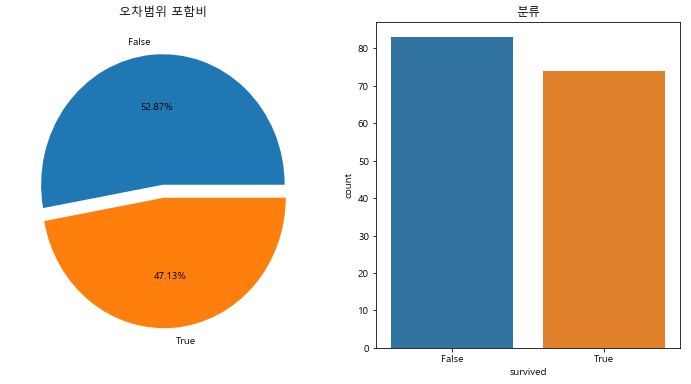

In [33]:
f,ax=plt.subplots(1, 2,figsize=(12,6))

total['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('오차범위 포함비')
ax[0].set_ylabel('')

sns.countplot('survived',data=total, ax=ax[1])
ax[1].set_title('분류')
plt.savefig('result_rate.png')
plt.show()

In [34]:
total.corr()

,번호,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
번호,1.000000,0.007656,NaN,-0.202018,-0.046187,0.147591,-0.157718,0.118698,0.118698
1회제공량 (g),0.007656,1.000000,NaN,0.258845,0.382951,-0.131915,0.401565,-0.125318,-0.125318
열량 (kcal),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
탄수화물 (g),-0.202018,0.258845,NaN,1.000000,-0.039688,-0.867059,0.485058,-0.161529,-0.161529
단백질 (g),-0.046187,0.382951,NaN,-0.039688,1.000000,0.135285,0.485432,-0.061803,-0.061803
지방 (g),0.147591,-0.131915,NaN,-0.867059,0.135285,1.000000,-0.021308,-0.197696,-0.197696
Error,-0.157718,0.401565,NaN,0.485058,0.485432,-0.021308,1.000000,-0.596958,-0.596958
survived,0.118698,-0.125318,NaN,-0.161529,-0.061803,-0.197696,-0.596958,1.000000,1.000000
b_servived,0.118698,-0.125318,NaN,-0.161529,-0.061803,-0.197696,-0.596958,1.000000,1.000000


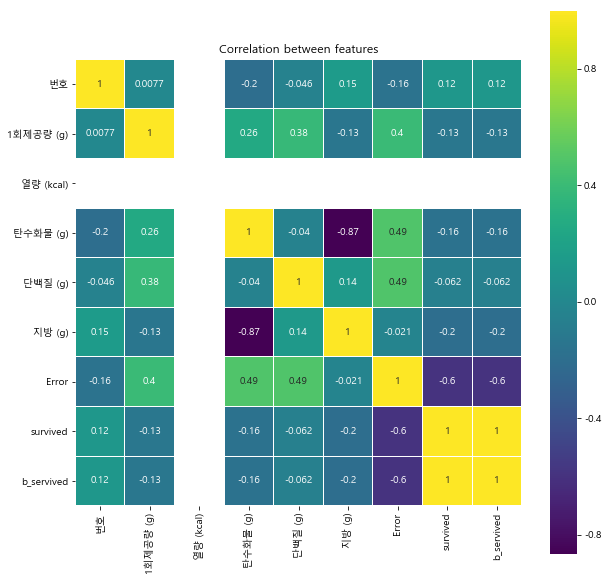

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(total.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.savefig('heatmap.png')
plt.show()

In [36]:
include = []
exclude = []
for i, d in enumerate(tmp_rate):
    if d:
        include.append(i)
    else:
        exclude.append(i)

In [37]:
fruits_include = total.loc[include]
fruits_exclude = total.loc[exclude]

In [38]:
fruits_include.to_excel('fruits_include.xlsx')
fruits_exclude.to_excel('fruits_exclude.xlsx')

In [39]:
fruits_include

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
2,1848,과실류,"감 가공(기타), 단감, 잼",22.222222,50,12.377778,0.066667,0.022222,-0.022222,True,1
8,1859,과실류,"구아바 가공(음료), 넥타(과육 20%)",98.039216,50,12.058824,0.098039,0.098039,-0.490196,True,1
9,1861,과실류,"구아바 가공(음료), 주스(과즙 10%)",98.039216,50,12.058824,0.098039,0.098039,-0.490196,True,1
10,1863,과실류,"구아바, 생것",131.578947,50,13.026316,0.789474,0.131579,6.447368,True,1
11,1865,과실류,"귤 가공(기타), 잼",16.181230,50,12.330097,0.161812,0.000000,-0.032362,True,1
17,1876,과실류,"귤쥬스,농축과즙",24.154589,50,12.367150,0.990338,0.314010,6.256039,True,1
19,1880,과실류,"다래, 생것",78.125000,50,12.656250,1.250000,0.312500,8.437500,True,1
24,1890,과실류,"딸기 가공(기타), 잼",16.501650,50,12.384488,0.092409,0.018152,0.070957,True,1
25,1892,과실류,"딸기, 개량종, 생것",147.058824,50,13.088235,1.176471,0.294118,9.705882,True,1
26,1893,과실류,"딸기쥬스,넥타",92.592593,50,11.111111,0.925926,0.185185,-0.185185,True,1


In [40]:
fruits_exclude

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,b_servived
0,1844,과실류,"감 가공(기타), 감말랭이",20.920502,50,14.353556,0.405858,0.033473,9.338912,False,0
1,1846,과실류,"감 가공(기타), 곶감",24.875622,50,14.291045,0.480100,0.019900,9.263682,False,0
3,1849,과실류,"감 가공(기타), 침지감, 생것",79.365079,50,13.412698,0.396825,0.079365,5.952381,False,0
4,1851,과실류,"감 가공(음료), 주스",131.578947,50,14.473684,0.131579,0.131579,9.605263,False,0
5,1853,과실류,"감, 단감, 생것",104.166667,50,14.229167,0.427083,0.041667,9.000000,False,0
6,1855,과실류,"감, 연시, 냉동",80.645161,50,14.806452,0.000000,0.032258,9.516129,False,0
7,1857,과실류,"감, 연시, 생것",81.967213,50,14.557377,0.237705,0.032787,9.475410,False,0
12,1867,과실류,"귤 가공(음료), 과일주스",135.135135,50,14.054054,0.270270,0.135135,8.513514,False,0
13,1869,과실류,"귤 가공(음료), 과일주스, 무가당",121.951220,50,14.146341,0.365854,0.121951,9.146341,False,0
14,1871,과실류,"귤 가공(통조림), 통조림, 무가당",83.333333,50,13.500000,1.000000,0.166667,9.500000,False,0


In [41]:
fruits  = fruits_include[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)']]
fruits.head()

,번호,탄수화물 (g),단백질 (g),지방 (g)
2,1848,12.377778,0.066667,0.022222
8,1859,12.058824,0.098039,0.098039
9,1861,12.058824,0.098039,0.098039
10,1863,13.026316,0.789474,0.131579
11,1865,12.330097,0.161812,0.000000


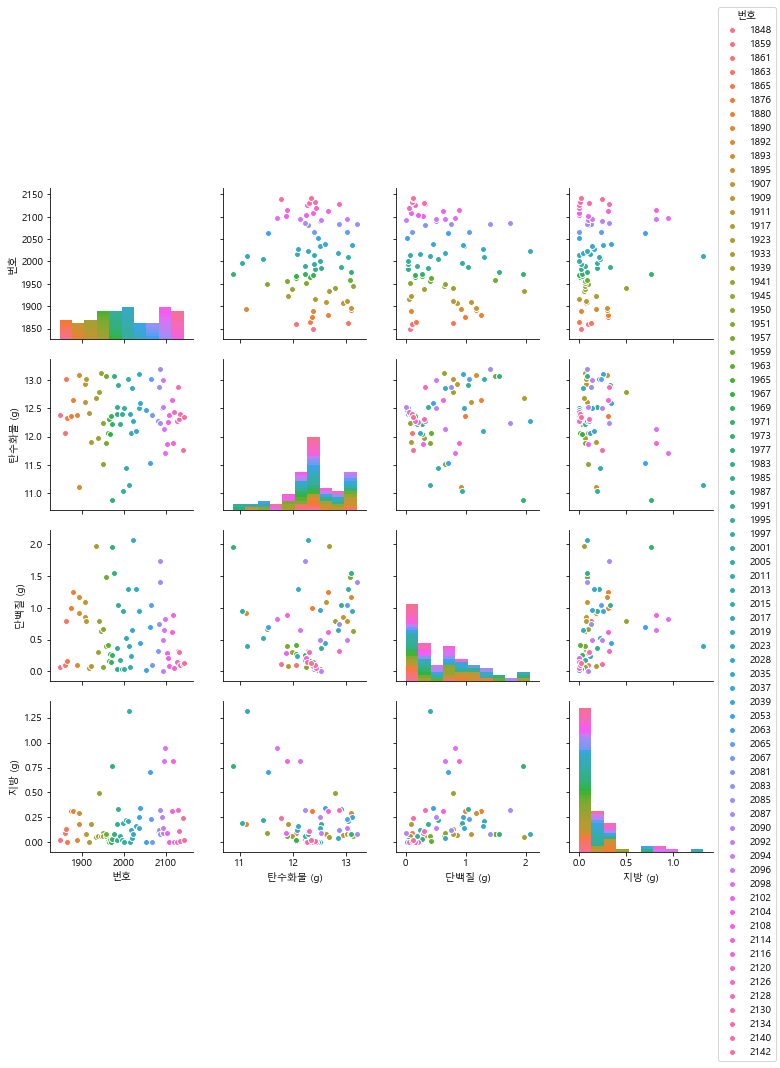

In [42]:
g = sns.pairplot(fruits, hue='번호',palette="husl")

In [47]:
g.savefig('fruits.jpg')

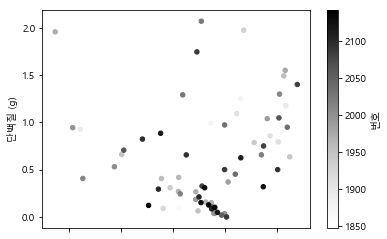

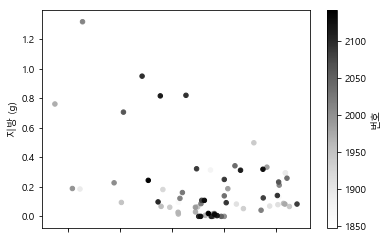

In [49]:
fruits.plot.scatter(x='탄수화물 (g)', y='단백질 (g)', c='번호')
fruits.plot.scatter(x='탄수화물 (g)', y='지방 (g)', c='번호')

In [51]:
fruits_include['식품군'].value_counts()

과실류    74
Name: 식품군, dtype: int64

In [50]:
fruits_exclude['식품군'].value_counts()

과실류    83
Name: 식품군, dtype: int64

In [52]:
fruitss  = total[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)', 'b_servived']]
fruitss.head()

,번호,탄수화물 (g),단백질 (g),지방 (g),b_servived
0,1844,14.353556,0.405858,0.033473,0
1,1846,14.291045,0.480100,0.019900,0
2,1848,12.377778,0.066667,0.022222,1
3,1849,13.412698,0.396825,0.079365,0
4,1851,14.473684,0.131579,0.131579,0


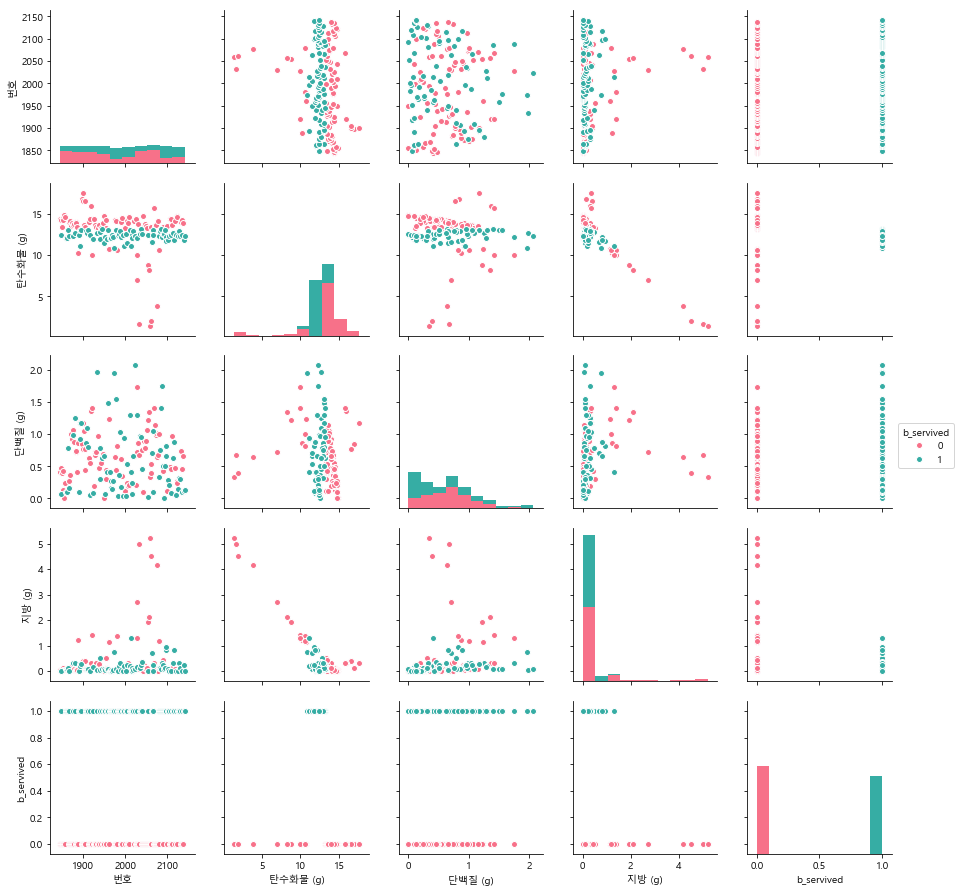

In [53]:
sns_plot = sns.pairplot(fruitss, hue='b_servived',palette="husl")

In [54]:
sns_plot.savefig("result_fruits.png")